# FairPredictor Autogluon Examples
This file contains demo code for an extended version of the example in Readme.md (additionally handling more fairness over multiple groups), and enforcing a range of fairness definition on COMPAS.

FairPredictor is a postprocessing approach for enforcing fairness, with support for a wide range of performance metrics and fairness criteria, and support for inferred attributes, i.e., it does not require access to protected attributes at test time. 
Under the hood, FairPredictor works by adjusting the decision boundary for each group individually. Where groups are not available, it makes use of inferred group membership to adjust decision boundaries.

The key idea underlying this toolkit is that for a wide range of use cases, the most suitable classifier should do more than maximize some form of accuracy.
We offer a general toolkit that allows different measures to be optimized and additional constraints to be imposed by tuning the behavior of a binary predictor on validation data.

For example, classifiers can be tuned to maximize performance for a wide range of metrics such as:

* Accuracy
* Balanced Accuracy
* F1 score
* MCC
* Custom utility functions

While also approximately satisfying a wide range of group constraints such as:

* Demographic Parity (The idea that positive decisions should occur at the same rates for all protected groups, for example for men at the same rate as for women)
* Equal Opportunity (The recall should be the same for all protected groups)
* Minimum recall constraints (The recall should be above a particular level for all groups)
* Minimum Precision constraints (The precision should be above a particular level for all groups)
* Custom Fairness Metrics

The full set of constraints and objectives can be seen in Readme.md 

In [1]:
# Load and train a baseline classifier

from autogluon.tabular import TabularDataset, TabularPredictor
from oxonfair import FairPredictor 
from oxonfair.utils import group_metrics as gm
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
predictor = TabularPredictor(label='class').fit(train_data=train_data,time_limit=5)

/opt/miniconda3/envs/ag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No path specified. Models will be saved in: "AutogluonModels/ag-20240617_191908"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_191908"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       6.56 GB / 16.00 GB (41.0%)
Disk Space Avail:   360.82 GB / 460.43 GB (78.4%)


Train Data Rows:    39073


Train Data Columns: 14


Label Column:       class


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  [' <=50K', ' >50K']


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K


	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    6735.36 MB


	Train Data (Original)  Memory Usage: 21.86 MB (0.3% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]


		('object', []) : 8 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 7 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]


		('int', [])       : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]


		('int', ['bool']) : 1 | ['sex']


	0.1s = Fit runtime


	14 features in original data used to generate 14 features in processed data.


	Train Data (Processed) Memory Usage: 2.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.17s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.0639828014229775, Train Rows: 36573, Val Rows: 2500


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.83s of the 4.82s of remaining time.


	0.7752	 = Validation score   (accuracy)


	1.42s	 = Training   runtime


	0.04s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 3.36s of the 3.36s of remaining time.


	0.766	 = Validation score   (accuracy)


	0.03s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 3.32s of the 3.32s of remaining time.


/opt/miniconda3/envs/ag/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


	Ran out of time, early stopping on iteration 156. Best iteration is:
	[145]	valid_set's binary_error: 0.1284


	0.8716	 = Validation score   (accuracy)


	4.17s	 = Training   runtime


	0.01s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.83s of the -1.03s of remaining time.


	Ensemble Weights: {'LightGBMXT': 0.842, 'KNeighborsUnif': 0.105, 'KNeighborsDist': 0.053}


	0.8744	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 6.13s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_191908")


In [2]:
# Modify predictor to enforce fairness over the train_data with respect to groups given by the column 'sex'
fpredictor = FairPredictor(predictor,train_data,'sex')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy,gm.demographic_parity,0.02)

In [3]:
# Evaluate on test data
fpredictor.predict(test_data)

0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Length: 9769, dtype: object

In [4]:
# Evaluate a range of performance measures, and compare against original classifier on test data
fpredictor.evaluate(test_data, verbose=True)

,original,updated
Accuracy,0.868973,0.842563
Balanced Accuracy,0.776058,0.723973
F1 score,0.684574,0.600312
MCC,0.613887,0.524332
Precision,0.798276,0.754902
Recall,0.599223,0.498274
ROC AUC,0.919433,0.817906


In [5]:
# Evaluate against a range of standard fairness definitions and compare against original classifier on test data
fpredictor.evaluate_fairness(test_data, verbose=True)

,original,updated
Statistical Parity,0.155761,0.013698
Predictive Parity,0.020717,0.354613
Equal Opportunity,0.065251,0.371301
Average Group Difference in False Negative Rate,0.065251,0.371301
Equalized Odds,0.056320,0.216631
Conditional Use Accuracy,0.060920,0.265098
Average Group Difference in Accuracy,0.098982,0.088835
Treatment Equality,0.051315,3.802436


In [6]:
# Evaluate a range of performance measures per group, and compare against original classifier on test data
fpredictor.evaluate_groups(test_data, verbose=True, return_original=True)

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                
original Overall             0.868973           0.776058  0.684574  0.613887   
          Female             0.934631           0.762758  0.641068  0.618349   
          Male               0.835648           0.771690  0.692108  0.593010   
         Maximum difference  0.098982           0.008931  0.051039  0.025339   
updated  Overall             0.842563           0.723973  0.600312  0.524332   
          Female             0.901490           0.862578  0.639198  0.603680   
          Male               0.812654           0.707908  0.588475  0.532366   
         Maximum difference  0.088835           0.154670  0.050724  0.071314   

                             Precision    Recall   ROC AUC  Positive Count  \
         Groups                                                              
original Overall              0.798276  0.599223  0.919433          2318.0   
          Female              0.780488  0.543909  0.930589           353.0   
          Male                0.801205  0.609160  0.900545          1965.0   
         Maximum difference   0.020717  0.065251  0.030044          1612.0   
updated  Overall              0.754902  0.498274  0.817906          2318.0   
          Female              0.526606  0.813031  0.930589           353.0   
          Male                0.881218  0.441730  0.900545          1965.0   
         Maximum difference   0.354613  0.371301  0.030044          1612.0   

                             Negative Count  Positive Label Rate  \
         Groups                                                    
original Overall                     7451.0             0.237281   
          Female                     2936.0             0.107327   
          Male                       4515.0             0.303241   
         Maximum difference          1579.0             0.195913   
updated  Overall                     7451.0             0.237281   
          Female                     2936.0             0.107327   
          Male                       4515.0             0.303241   
         Maximum difference          1579.0             0.195913   

                             Positive Prediction Rate  
         Groups                                        
original Overall                             0.178114  
          Female                             0.074795  
          Male                               0.230556  
         Maximum difference                  0.155761  
updated  Overall                             0.156618  
          Female                             0.165704  
          Male                               0.152006  
         Maximum difference                  0.013698

In [7]:
#We can repeat the same analysis using the feature 'race' instead of 'sex'
fpredictor = FairPredictor(predictor,train_data, 'race')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy, gm.demographic_parity, .02)

In [8]:
# Unlike the previous case, we find that demographic parity is still high on test data, although it is improved.
fpredictor.evaluate_fairness(test_data, verbose=True)

,original,updated
Statistical Parity,0.089690,0.043099
Predictive Parity,0.132235,0.241701
Equal Opportunity,0.153663,0.160266
Average Group Difference in False Negative Rate,0.153663,0.160266
Equalized Odds,0.092069,0.104162
Conditional Use Accuracy,0.082708,0.152206
Average Group Difference in Accuracy,0.043393,0.022143
Treatment Equality,0.222273,2.197229


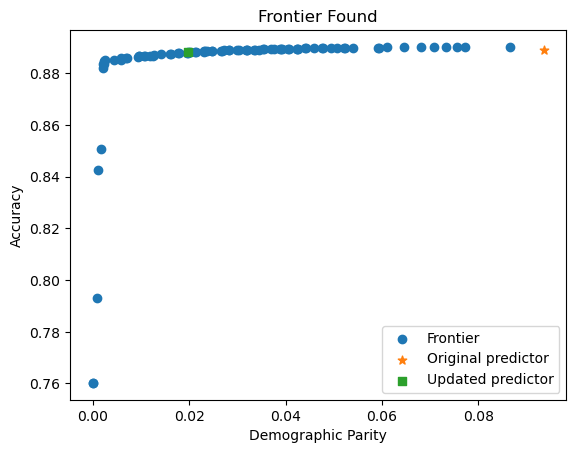

In [9]:
#To debug this, we can look at the Pareto Frontier of solutions considered, on the training set
fpredictor.plot_frontier() 

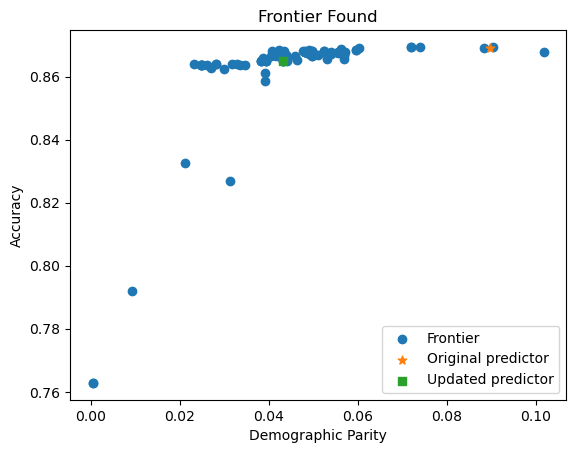

In [10]:
#and on the test set
fpredictor.plot_frontier(test_data) 

In [11]:
#We find that the demographic parity is very different on test data for a range of solutions found.
#By looking at the per group decomposition, we can find out why.
fpredictor.evaluate_groups(test_data, verbose=True)

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                 
original Overall              0.868973           0.776058  0.684574  0.613887   
          Amer-Indian-Eskimo  0.934959           0.636364  0.428571  0.504525   
          Asian-Pac-Islander  0.859756           0.764319  0.661765  0.583363   
          Black               0.928171           0.737251  0.619048  0.610779   
          Other               0.913580           0.735915  0.588235  0.552396   
          White               0.861610           0.777682  0.689766  0.612016   
         Maximum difference   0.075203           0.141319  0.261195  0.107491   
updated  Overall              0.864981           0.780276  0.685128  0.606017   
          Amer-Indian-Eskimo  0.878049           0.769075  0.482759  0.434487   
          Asian-Pac-Islander  0.850610           0.713329  0.588235  0.541195   
          Black               0.897868           0.824945  0.631579  0.580505   
          Other               0.864198           0.836620  0.592593  0.543856   
          White               0.861850           0.781440  0.693921  0.614000   
         Maximum difference   0.047258           0.123291  0.211162  0.179513   

                              Precision    Recall   ROC AUC  Positive Count  \
         Groups                                                               
original Overall               0.798276  0.599223  0.919433          2318.0   
          Amer-Indian-Eskimo   1.000000  0.272727  0.928571            11.0   
          Asian-Pac-Islander   0.762712  0.584416  0.900864            77.0   
          Black                0.852459  0.485981  0.940647           107.0   
          Other                0.714286  0.500000  0.863380            10.0   
          White                0.797516  0.607667  0.916398          2113.0   
         Maximum difference    0.285714  0.334940  0.077267          2103.0   
updated  Overall               0.766970  0.619068  0.902293          2318.0   
          Amer-Indian-Eskimo   0.388889  0.636364  0.928571            11.0   
          Asian-Pac-Islander   0.833333  0.454545  0.900864            77.0   
          Black                0.557143  0.728972  0.940647           107.0   
          Other                0.470588  0.800000  0.863380            10.0   
          White                0.790206  0.618552  0.916398          2113.0   
         Maximum difference    0.444444  0.345455  0.077267          2103.0   

                              Negative Count  Positive Label Rate  \
         Groups                                                     
original Overall                      7451.0             0.237281   
          Amer-Indian-Eskimo           112.0             0.089431   
          Asian-Pac-Islander           251.0             0.234756   
          Black                        784.0             0.120090   
          Other                         71.0             0.123457   
          White                       6233.0             0.253175   
         Maximum difference           6162.0             0.163744   
updated  Overall                      7451.0             0.237281   
          Amer-Indian-Eskimo           112.0             0.089431   
          Asian-Pac-Islander           251.0             0.234756   
          Black                        784.0             0.120090   
          Other                         71.0             0.123457   
          White                       6233.0             0.253175   
         Maximum difference           6162.0             0.163744   

                              Positive Prediction Rate  
         Groups                                         
original Overall                              0.178114  
          Amer-Indian-Eskimo                  0.024390  
          Asian-Pac-Islander                  0.179878  
          Black                               0.068462  
          Other      

In [12]:
#The groups with the smallest Positive Prediction Rate (American-Indian-Eskimo, and Asian-Pacific-Islander) 
# only have around 100-300 samples making it impossible to accurately evaluate demographic parity, while the
# group labelled 'Other' has even less data.
# Moreover, on training data we find that there are less than 350 people identified as American-Indian-Eskimo, 
# meaning that it is not possible to predict if the positive prediction rate will hold on new data. 
fpredictor.evaluate_groups(verbose=True)

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                 
original Overall              0.888951           0.812828  0.742171  0.679654   
          Amer-Indian-Eskimo  0.936599           0.798567  0.710526  0.686736   
          Asian-Pac-Islander  0.874895           0.827344  0.762360  0.680040   
          Black               0.935424           0.781025  0.683871  0.663316   
          Other               0.926154           0.742982  0.625000  0.610476   
          White               0.883319           0.813129  0.744947  0.677550   
         Maximum difference   0.061704           0.084361  0.137360  0.076260   
updated  Overall              0.888260           0.820083  0.747309  0.680235   
          Amer-Indian-Eskimo  0.907781           0.879200  0.698113  0.658761   
          Asian-Pac-Islander  0.865659           0.777515  0.705882  0.650614   
          Black               0.927517           0.898649  0.741784  0.709708   
          Other               0.938462           0.954167  0.795918  0.779342   
          White               0.883918           0.817372  0.749176  0.680184   
         Maximum difference   0.072802           0.176651  0.097805  0.128728   

                              Precision    Recall   ROC AUC  Positive Count  \
         Groups                                                               
original Overall               0.837131  0.666560  0.951884          9369.0   
          Amer-Indian-Eskimo   0.843750  0.613636  0.957846            44.0   
          Asian-Pac-Islander   0.810169  0.719880  0.947550           332.0   
          Black                0.838608  0.577342  0.973068           459.0   
          Other                0.833333  0.500000  0.980877            40.0   
          White                0.838216  0.670356  0.948752          8494.0   
         Maximum difference    0.033581  0.219880  0.033327          8454.0   
updated  Overall               0.816285  0.689081  0.938464          9369.0   
          Amer-Indian-Eskimo   0.596774  0.840909  0.957846            44.0   
          Asian-Pac-Islander   0.905660  0.578313  0.947550           332.0   
          Black                0.651815  0.860566  0.973068           459.0   
          Other                0.672414  0.975000  0.980877            40.0   
          White                0.831014  0.682011  0.948752          8494.0   
         Maximum difference    0.308886  0.396687  0.033327          8454.0   

                              Negative Count  Positive Label Rate  \
         Groups                                                     
original Overall                     29704.0             0.239782   
          Amer-Indian-Eskimo           303.0             0.126801   
          Asian-Pac-Islander           859.0             0.278757   
          Black                       3335.0             0.120980   
          Other                        285.0             0.123077   
          White                      24922.0             0.254190   
         Maximum difference          24637.0             0.157777   
updated  Overall                     29704.0             0.239782   
          Amer-Indian-Eskimo           303.0             0.126801   
          Asian-Pac-Islander           859.0             0.278757   
          Black                       3335.0             0.120980   
          Other                        285.0             0.123077   
          White                      24922.0             0.254190   
         Maximum difference          24637.0             0.157777   

                              Positive Prediction Rate  
         Groups                                         
original Overall                              0.190925  
          Amer-Indian-Eskimo                  0.092219  
          Asian-Pac-Islander                  0.247691  
          Black                               0.083289  
          Other      

## Fairness on COMPAS using Inferred Attributes

We demonstrate how to enforce a wide range of fairness definitions on the COMPAS dataset. This dataset records paroles caught violating the terms of parole. As it measures who was caught, it is strongly influenced by policing and environmental biases, and should not be confused with a measurement of who actually violated their terms of parole. See [this paper](https://datasets-benchmarks-proceedings.neurips.cc/paper/2021/file/92cc227532d17e56e07902b254dfad10-Paper-round1.pdf) for a discussion of its limitations and caveats. 
We use it because it is a standard fairness dataset that captures such strong differences in outcome between people identified as African-American and everyone else, that classifiers trained on this dataset violate most definitions of fairness.

As many of the ethnic groups are too small for reliable statistical estimation, we only consider differences is in outcomes between African-Americans vs. everyone else (labeled as other).
We load and preprocess the COMPAS dataset, splitting it into three roughly equal partitions of train, validation, and test:

In [13]:
import numpy as np
import pandas as pd
from oxonfair import inferred_attribute_builder
all_data = pd.read_csv('https://github.com/propublica/compas-analysis/raw/master/compas-scores-two-years.csv')
condensed_data=all_data[['sex','race','age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'age_cat', 'c_charge_degree','two_year_recid']].copy()
condensed_data.replace({'Caucasian':'Other', 'Hispanic':'Other', 'Native American':'Other', 'Asian':'Other'},inplace=True)
train=condensed_data.sample(frac=0.3, random_state=0)
val_and_test=condensed_data.drop(train.index)
val=val_and_test.sample(frac=0.5, random_state=0)
test=val_and_test.drop(val.index)

In [14]:
# To enforce fairness constraints without access to protected attributes at test time, we train two classifiers to infer the 2-year recidivism rate, and ethnicity.
  
predictor2, protected = inferred_attribute_builder(train, 'two_year_recid', 'race', time_limit=5)


No path specified. Models will be saved in: "AutogluonModels/ag-20240617_192045"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_192045"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       9.80 GB / 16.00 GB (61.3%)
Disk Space Avail:   357.78 GB / 460.43 GB (77.7%)


Train Data Rows:    2164


Train Data Columns: 8


Label Column:       two_year_recid


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  [0, 1]


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 = 1, class 0 = 0


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    10034.31 MB


	Train Data (Original)  Memory Usage: 0.47 MB (0.0% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('object', []) : 3 | ['sex', 'age_cat', 'c_charge_degree']


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 1 | ['age_cat']


		('int', [])       : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('int', ['bool']) : 2 | ['sex', 'c_charge_degree']


	0.0s = Fit runtime


	8 features in original data used to generate 8 features in processed data.


	Train Data (Processed) Memory Usage: 0.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.03s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1731, Val Rows: 433


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.97s of the 4.97s of remaining time.


	0.6351	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.01s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 4.94s of the 4.94s of remaining time.


	0.6259	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.01s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 4.92s of the 4.92s of remaining time.


	0.6882	 = Validation score   (accuracy)


	1.56s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: LightGBM ... Training model for up to 3.35s of the 3.35s of remaining time.


	0.6767	 = Validation score   (accuracy)


	2.09s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: RandomForestGini ... Training model for up to 1.26s of the 1.26s of remaining time.


	0.6074	 = Validation score   (accuracy)


	0.46s	 = Training   runtime


	0.04s	 = Validation runtime


Fitting model: RandomForestEntr ... Training model for up to 0.74s of the 0.74s of remaining time.


	0.6097	 = Validation score   (accuracy)


	0.35s	 = Training   runtime


	0.04s	 = Validation runtime


Fitting model: CatBoost ... Training model for up to 0.33s of the 0.33s of remaining time.


	Time limit exceeded... Skipping CatBoost.


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.97s of the -0.06s of remaining time.


	Ensemble Weights: {'LightGBM': 0.667, 'LightGBMXT': 0.333}


	0.6928	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 5.11s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_192045")


No path specified. Models will be saved in: "AutogluonModels/ag-20240617_192050"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_192050"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       10.55 GB / 16.00 GB (65.9%)
Disk Space Avail:   358.74 GB / 460.43 GB (77.9%)


Train Data Rows:    2164


Train Data Columns: 8


Label Column:       race


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  ['African-American', 'Other']


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 = Other, class 0 = African-American


	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Other) vs negative (African-American) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    10803.08 MB


	Train Data (Original)  Memory Usage: 0.47 MB (0.0% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('object', []) : 3 | ['sex', 'age_cat', 'c_charge_degree']


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 1 | ['age_cat']


		('int', [])       : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('int', ['bool']) : 2 | ['sex', 'c_charge_degree']


	0.0s = Fit runtime


	8 features in original data used to generate 8 features in processed data.


	Train Data (Processed) Memory Usage: 0.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.03s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1731, Val Rows: 433


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.97s of the 4.97s of remaining time.


	0.6051	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 4.94s of the 4.94s of remaining time.


	0.5889	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.01s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 4.92s of the 4.92s of remaining time.


	0.6559	 = Validation score   (accuracy)


	3.28s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: LightGBM ... Training model for up to 1.63s of the 1.63s of remaining time.


	Ran out of time, early stopping on iteration 134. Best iteration is:
	[4]	valid_set's binary_error: 0.364896


	0.6351	 = Validation score   (accuracy)


	1.63s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.97s of the -0.04s of remaining time.


	Ensemble Weights: {'LightGBMXT': 0.8, 'KNeighborsUnif': 0.2}


	0.6582	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 5.08s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_192050")


In [15]:
# From these a single predictor that maximizes acuracy while reducing the demographic parity violation to less than 2.5% can be trained by running:

fpredictor=FairPredictor(predictor2, val, 'race', inferred_groups=protected)
fpredictor.fit(gm.accuracy, gm.demographic_parity, 0.025)

In [16]:
#However, instead we will show how a family of fairness measures can be individually optimized. 
# The following code plots a table showing the change in accuracy and the fairness measure on a held-out test set as we decrease
# the fairness measure to less than 0.025 for all measures except for disparate impact which we raise to above 0.975.
# We define a helper function for evaluation:

def evaluate(fpredictor,use_metrics):
    "Print a table showing the accuracy drop that comes with enforcing fairness"
    extra_metrics= {**use_metrics, 'accuracy':gm.accuracy}
    collect=pd.DataFrame(columns=['Measure (original)', 'Measure (updated)', 'Accuracy (original)', 'Accuracy (updated)'])
    for d in use_metrics.items():
        if d[1].greater_is_better is False:
            fpredictor.fit(gm.accuracy,d[1], 0.025)
        else:
            fpredictor.fit(gm.accuracy,d[1], 1-0.025)
        tmp=fpredictor.evaluate_fairness(test,metrics=extra_metrics)
        collect.loc[d[1].name]=np.concatenate((np.asarray(tmp.loc[d[1].name]), np.asarray(tmp.loc[gm.accuracy.name])), 0)
    return collect

In [17]:
#We can now contrast the behavior of a fair classifier that relies on access to the protected
# attribtute at test time with one that infers it.

# we first create a classifer using the protected attribute
predictor=TabularPredictor(label='two_year_recid').fit(train_data=train, time_limit=5)

No path specified. Models will be saved in: "AutogluonModels/ag-20240617_192055"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_192055"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       7.88 GB / 16.00 GB (49.2%)
Disk Space Avail:   358.74 GB / 460.43 GB (77.9%)


Train Data Rows:    2164


Train Data Columns: 9


Label Column:       two_year_recid


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  [0, 1]


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 = 1, class 0 = 0


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    8069.29 MB


	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('object', []) : 4 | ['sex', 'race', 'age_cat', 'c_charge_degree']


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 1 | ['age_cat']


		('int', [])       : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('int', ['bool']) : 3 | ['sex', 'race', 'c_charge_degree']


	0.0s = Fit runtime


	9 features in original data used to generate 9 features in processed data.


	Train Data (Processed) Memory Usage: 0.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.04s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1731, Val Rows: 433


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.96s of the 4.96s of remaining time.


	0.6351	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 4.94s of the 4.94s of remaining time.


	0.6259	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 4.91s of the 4.91s of remaining time.


	0.6975	 = Validation score   (accuracy)


	2.65s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: LightGBM ... Training model for up to 2.24s of the 2.24s of remaining time.


	Ran out of time, early stopping on iteration 249. Best iteration is:
	[42]	valid_set's binary_error: 0.325635


	0.6744	 = Validation score   (accuracy)


	2.25s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.96s of the -0.08s of remaining time.


	Ensemble Weights: {'LightGBMXT': 1.0}


	0.6975	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 5.12s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_192055")


In [18]:
#Create a fair predictor object, using the attribute 'race' on validation data
fpredictor = FairPredictor(predictor, val, 'race')
#and then evaluate it
evaluate(fpredictor, gm.clarify_metrics)
#Note that Class Imbalance is a property of the dataset and can not be altered.

,Measure (original),Measure (updated),Accuracy (original),Accuracy (updated)
Demographic Parity,0.336580,0.010250,0.661386,0.646337
Disparate Impact,0.424223,0.985274,0.661386,0.638812
Average Group Difference in Conditional Acceptance Rate,0.644987,0.055467,0.661386,0.670891
Average Group Difference in Conditional Rejectance Rate,0.354906,0.003563,0.661386,0.666535
Average Group Difference in Accuracy,0.048422,0.036576,0.661386,0.662574
Average Group Difference in Recall,0.306877,0.065208,0.661386,0.640396
Average Group Difference in Acceptance Rate,0.000623,0.017213,0.661386,0.666139
Average Group Difference in Specificity,0.296718,0.054075,0.661386,0.671287
Average Group Difference in Rejection Rate,0.049978,0.072272,0.661386,0.667723
Treatment Equality,1.117626,0.047186,0.661386,0.672079


In [19]:
 # Now using infered attributes
fpredictor2 = FairPredictor(predictor2, val, 'race', inferred_groups=protected)
evaluate(fpredictor2, gm.clarify_metrics)

,Measure (original),Measure (updated),Accuracy (original),Accuracy (updated)
Demographic Parity,0.234362,0.035235,0.671287,0.554851
Disparate Impact,0.561681,0.988790,0.671287,0.542970
Average Group Difference in Conditional Acceptance Rate,0.300350,0.008952,0.671287,0.622574
Average Group Difference in Conditional Rejectance Rate,0.165646,0.017900,0.671287,0.653861
Average Group Difference in Accuracy,0.043198,0.042238,0.671287,0.666139
Average Group Difference in Recall,0.190611,0.018044,0.671287,0.557624
Average Group Difference in Acceptance Rate,0.033289,0.207826,0.671287,0.588515
Average Group Difference in Specificity,0.197344,0.076504,0.671287,0.651485
Average Group Difference in Rejection Rate,0.074006,0.077252,0.671287,0.666535
Treatment Equality,0.561487,0.069292,0.671287,0.659010
